# Mall Customer Segmentation 

Pobierz dane z https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download

## Pobranie danych

In [29]:
import pandas as pd
from sklearn.manifold import TSNE
import warnings
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv', index_col=0)

In [3]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

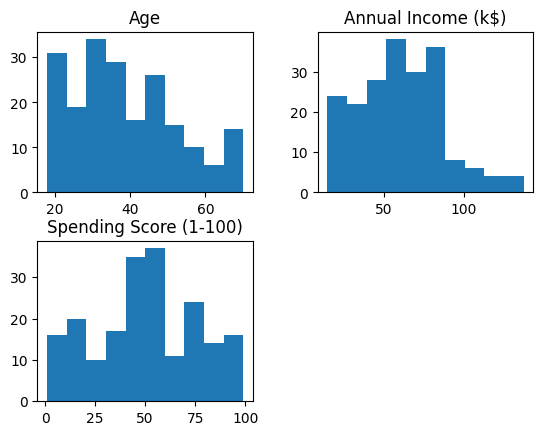

In [6]:
df.hist(grid=False);

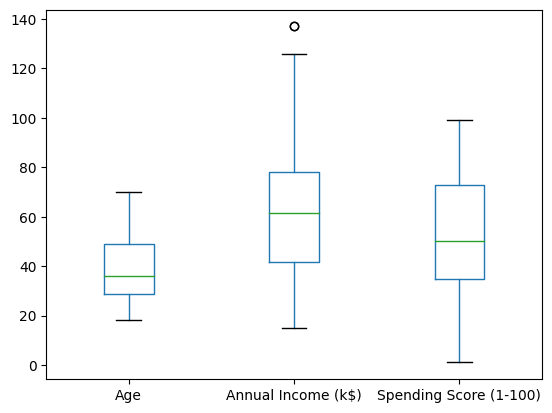

In [7]:
df.boxplot(grid=False);


### Transformacja zmiennych kategorycznych do zmiennych binarnych - One-Hot Encoding

Dla zmiennych kategorycznych odległość pomiędzy kolejnymi kategoriami nie ma sensu, dlatego zmienne kategoryczne zamieniamy na szereg zmiennych binarnych, każda odpowiadająca jednej kategorii.

Np. zmienną kategoryczną `Marka samochodu` o wartościach `Opel`, `VW`, `Audi` przekształcamy do 3 zmiennych binarnych `czy_Opel`, `czy_VW`, `czy_Audi`. 

Zauważmy jednak, że jeśli obiekt może należeć tylko do jednej kategorii to wystarczą nam tylko 2 z tych zmiennych.

Np. jeśli `czy_VW = 0` (`False`) i `czy_Audi = 0`, wówczas wiemy jaką wartość przyjmuje zmienna `czy_Opel`. 


In [8]:
df = pd.get_dummies(data=df, drop_first=True)

In [9]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


In [10]:
X = df.values

## Podejrzenie rozmaitości

In [18]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    tsne = TSNE(learning_rate='auto', init='pca').fit_transform(X)

In [20]:
fig = px.scatter(
    tsne, 
    x=0,
    y=1,
    template='plotly_white',
)
fig.update_layout(
    xaxix_title=''
)
fig.show()

## Klastrowanie hierarchiczne

In [49]:
from sklearn.cluster import AgglomerativeClustering

In [54]:
n_clusters = 6

In [55]:
labels = AgglomerativeClustering(n_clusters=n_clusters).fit_predict(X)

In [56]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [86]:
def plot_agglomerative_clusters(X, n_clusters, linkage='ward'):
    import bisect
    clusters_grammar = ['klaster', 'klastry', 'klastry', 'klastry', 'klastrów']
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = model.fit_predict(X)

    data = []
    for cluster in range(n_clusters):
        idx_cluster = np.where(labels == cluster)[0]
        trace = go.Scatter(
            x=tsne[idx_cluster, 0],
            y=tsne[idx_cluster, 1],
            mode='markers',
            name=cluster,
        )
        data.append(trace)

    clusters_declination = clusters_grammar[
        np.min((
            len(clusters_grammar)-1, 
            bisect.bisect(range(2, len(clusters_grammar)+2), n_clusters),
        ))
    ]
    layout = go.Layout(title=f'Podział danych na {n_clusters} {clusters_declination}', template='plotly_white')
    fig = go.Figure(data=data, layout=layout)
    return fig, model


In [92]:
fig, model6 = plot_agglomerative_clusters(X, 6)
fig.show()

In [94]:
fig, model3 = plot_agglomerative_clusters(X, 3)
fig.show()

In [95]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



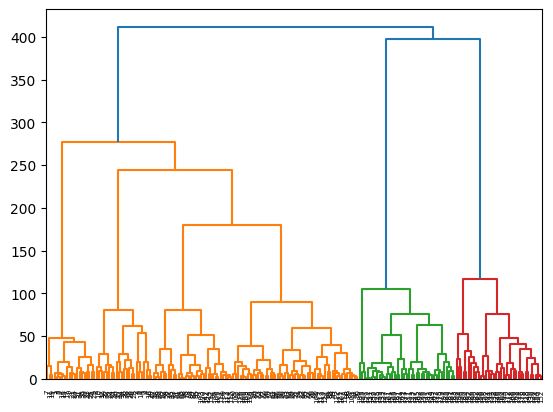

In [97]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)
plot_dendrogram(model)